<a href="https://colab.research.google.com/github/NadjaNovicic/Masinsko-ucenje/blob/main/Prvi_pismeni_prakticni_deo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

## Ucitavanje podataka

Koliko ima slucajeva u skupu podataka?
Koliko ima nezavisnih promenjivih u skupu podataka?

Ima 30 nezavisnih i jedna zavisna

In [100]:
data = pd.read_csv("dataset.csv")
data.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3.0,NaN,1,1.0,3,NaN,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3.0,3.0,1,NaN,3,4.0,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3.0,NaN,2,NaN,3,10.0,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2.0,NaN,1,1.0,5,2.0,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,no,no,4,3.0,2.0,1,NaN,5,4.0,10


## Preprocesiranje podataka

Da li postoje nedostajuce vrednosti?
Koje sve promenjive imaju nedostajuce vrednosti?
Kako cete resiti nedostajuce vrednosti? Zbog cega?
Nakon preprocesiranja, koliko imamo nezavisnih promenjivih?
Kog su tipa nezavisne promenjive?



reason,famsup,freetime, goout, walc,absences imaju nedostajuce vrednosti
nedostajuce vrednosti cu resiti tako sto cu nedostajuce uabsences,freetime i goout popuniti medianama

za famsup cu iybaciti redove koji nemajuvrednosti ,jer ih ne mogu popuniti jer nisu numericki podaci ne mogu raditi medijanu za njih

reason i Walc cu potpuno izbaciti jer je mnogo veliki procenat nepostojecih
Za sve nezavisne koje su kategorijskog tipa, iskoristicu  get_dummies i prebacicu ih u numerike


<Axes: >

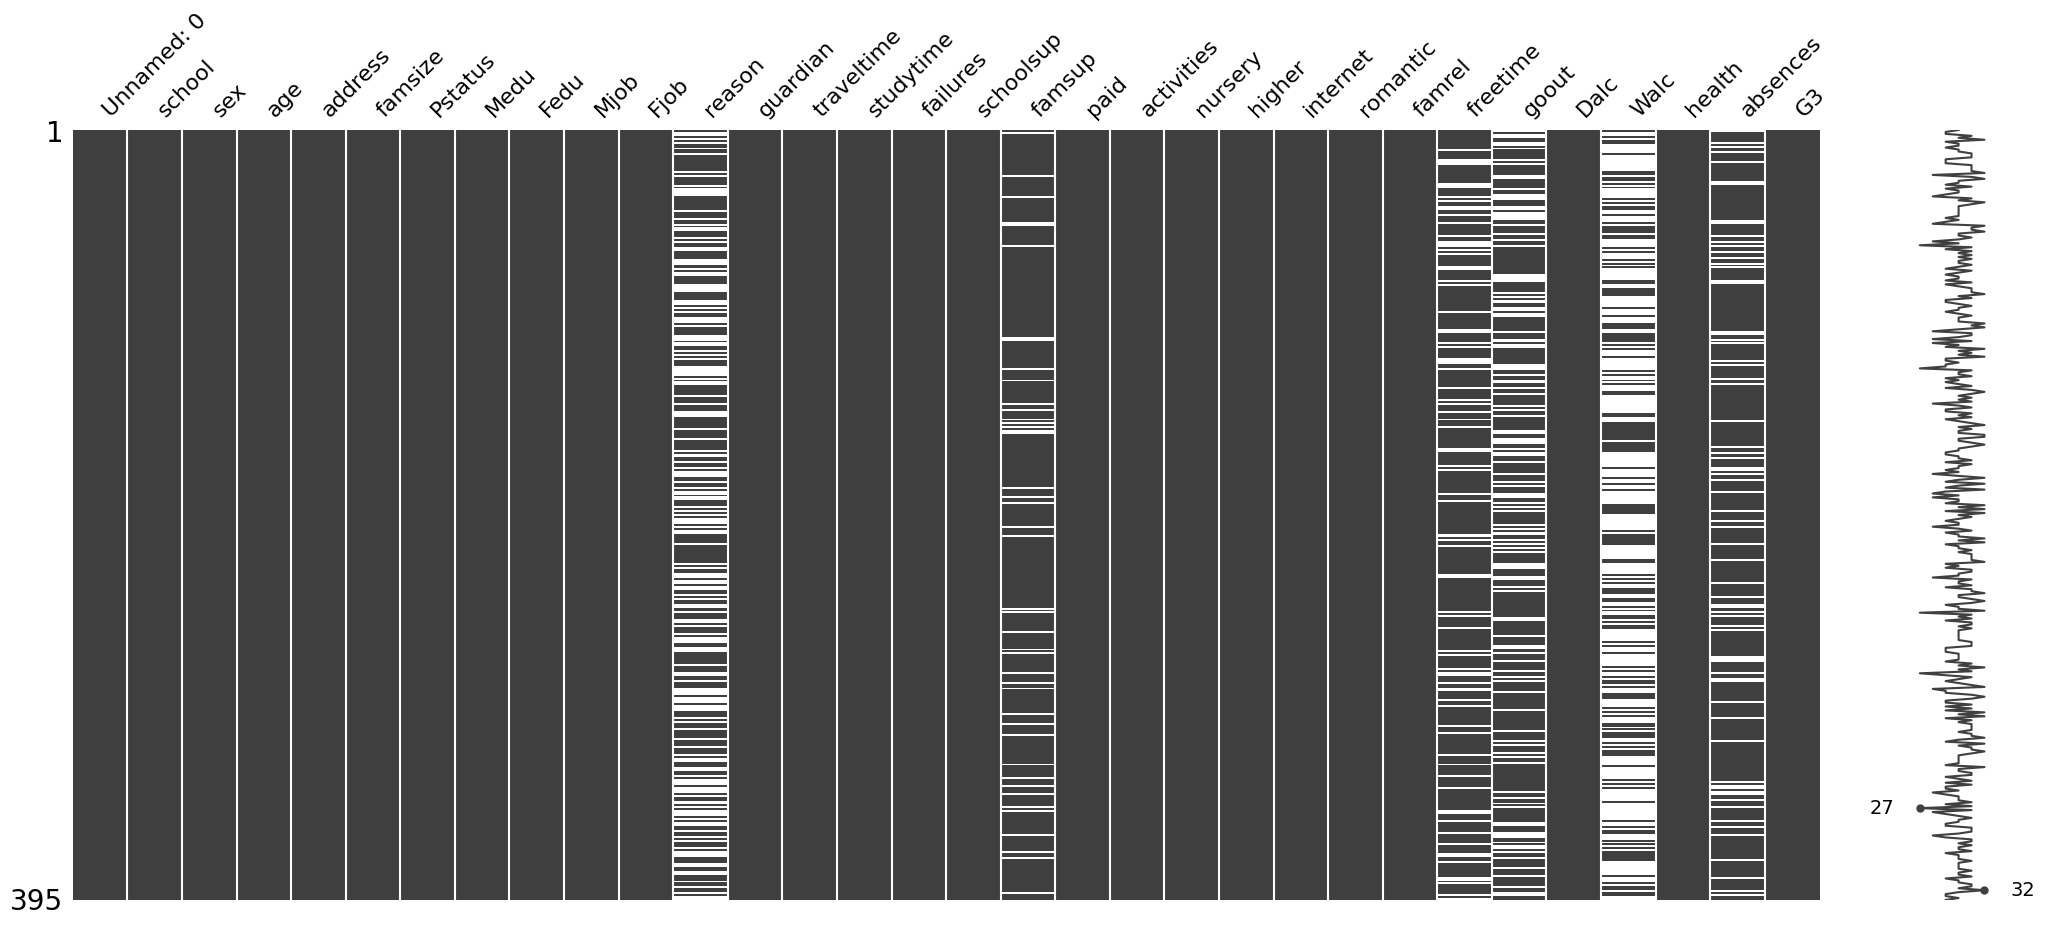

In [101]:
msno.matrix(data)


In [102]:
data['freetime'] = data['freetime'].fillna(data['freetime'].median())
data['goout'] = data['goout'].fillna(data['goout'].median())
data['absences'] = data['absences'].fillna(data['absences'].median())

<Axes: >

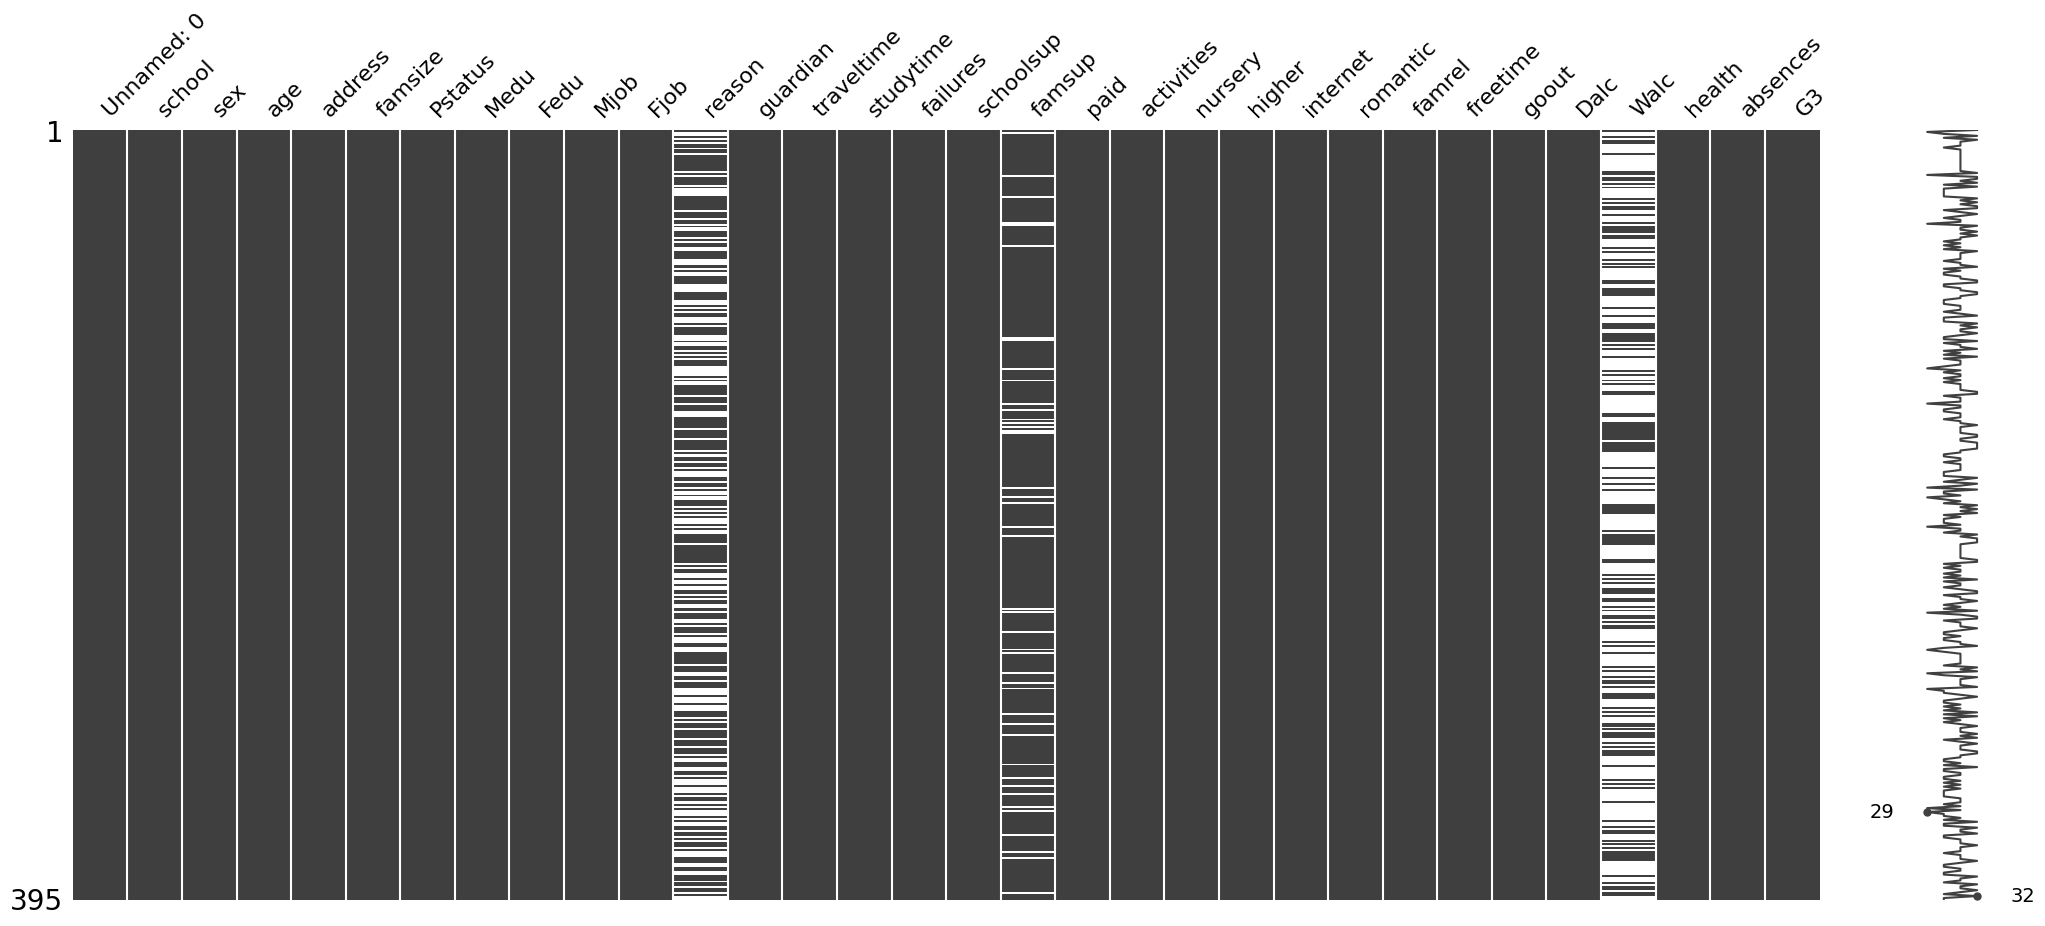

In [103]:
msno.matrix(data)

In [104]:
data=data.dropna(subset=['famsup'])

In [105]:
data.drop(columns=["Walc"], inplace=True)
data.drop(columns=["reason"], inplace=True)

<Axes: >

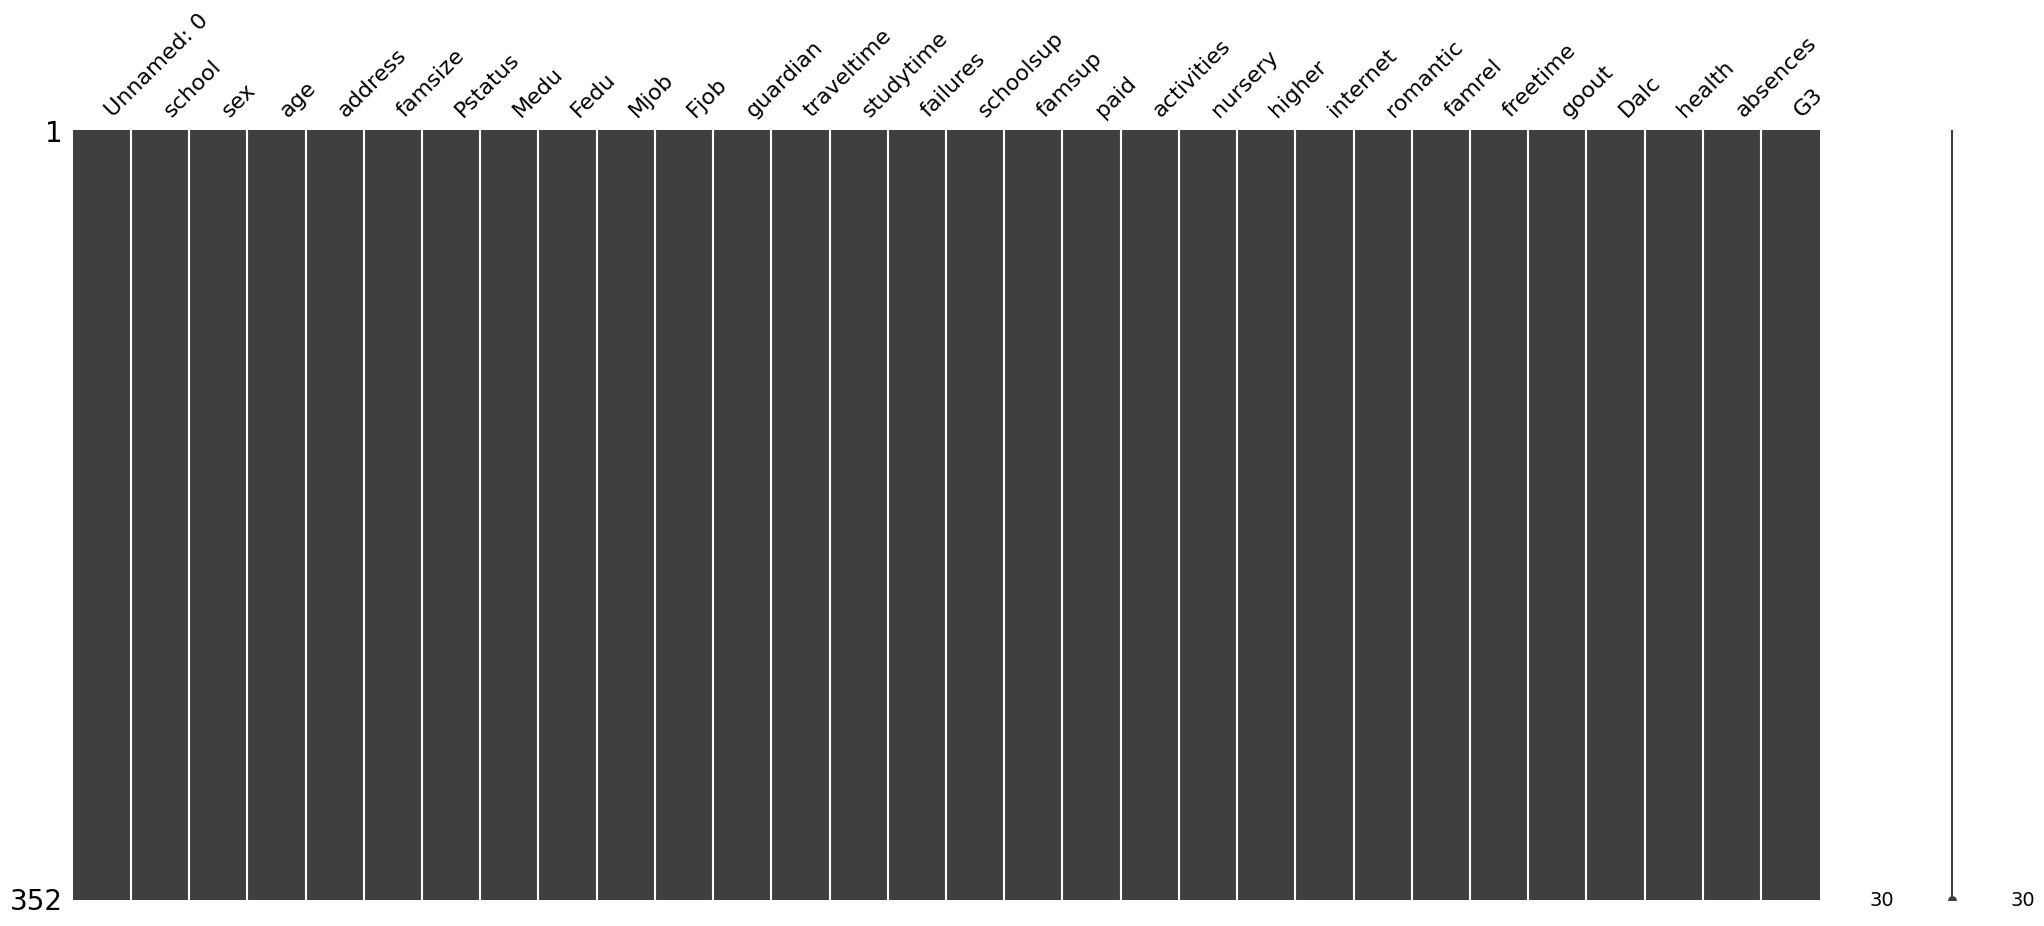

In [106]:
msno.matrix(data)

In [107]:
cat = ['school','sex','age','address','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
data = pd.get_dummies(data, columns=cat, drop_first=True)
data.head()

,Unnamed: 0,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0,4,4,2,2,0,4,3.0,3.0,1,...,1,0,1,0,0,0,1,1,0,0
2,2,1,1,1,2,3,4,3.0,3.0,2,...,1,0,1,0,1,0,1,1,1,0
3,3,4,2,1,3,0,3,2.0,3.0,1,...,1,0,0,1,1,1,1,1,1,1
4,4,3,3,1,2,0,4,3.0,2.0,1,...,0,0,0,1,1,0,1,1,0,0
5,5,4,3,1,2,0,5,4.0,2.0,1,...,1,0,0,1,1,1,1,1,1,0


## Obucavanje modela

Kako definisete model?
Sta su ulazni podaci u model a sta izlazni?
Koju metriku koristite da ocenite valjanost modela? Zasto?
Koju metodu obuke koristi ovaj model?
Koliko parametara ima ovaj model?

Koristim trening test split
A posle rmse metriku

In [111]:
from sklearn.linear_model import LinearRegression
# definicija modela
model = LinearRegression()
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)
print(len(train))
print(len(test))
model.fit(X=train[['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','health','absences']], y=train['G3'])
y_pred = model.predict(X=test[['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','health','absences']])
y_true = test[['G3']]

281
71


KeyError: "['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'] not in index"

## Evaluacija modela

Kakvi su rezultati modela?
Da li je model bolji od modela koji nasumicno vraca izlaz?